In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Imputing Missing Values

In [6]:
dataset['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [7]:
for column in ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

In [8]:
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(np.nanmedian(dataset['LoanAmount']))

In [9]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label Encoding

In [10]:
dataset['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
for column in ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']:
    encoder = LabelEncoder()
    dataset[column] = encoder.fit_transform(dataset[column])

In [13]:
encoder = LabelEncoder()
dataset['Loan_Status'] = encoder.fit_transform(dataset['Loan_Status'])

In [14]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,Urban,1


## One Hot Encoding

In [15]:
dataset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [16]:
dummy_data = pd.get_dummies(dataset['Property_Area'])
dataset = pd.concat([dataset, dummy_data], axis=1)
dataset.drop(['Property_Area'], axis=1, inplace=True)

In [17]:
dataset.drop(['Loan_ID'], axis=1, inplace=True)

In [18]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,1,0,0,1


## Train & Test Split

In [19]:
X = dataset.drop(['Loan_Status'], axis=1)
y = dataset['Loan_Status']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=300)

In [21]:
print('Size of X_train : ' + str(X_train.shape))
print('Size of y_train : ' + str(y_train.shape))
print('Size of X_test : ' + str(X_test.shape))
print('Size of y_test : ' + str(y_test.shape))

Size of X_train : (491, 13)
Size of y_train : (491,)
Size of X_test : (123, 13)
Size of y_test : (123,)


## Generating Synthetic Samples

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=300)
X_train, y_train = sm.fit_sample(X_train, y_train)

## Scaling Data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

<a id='knn'></a>

### KNN Model

In [25]:
# Building Model With Neighbors From 1 to 24
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score

knn_scores = []
knn_test_f1 = []
knn_test_acc = []
n_val = []
for i in range(1,25):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    acc_score = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5)
    knn_scores.append(np.mean(acc_score))
    n_val.append(i)
    
    predictions = clf.predict(X_test)
    # Caculating F1 Score
    knn_test_f1_score = f1_score(y_test, predictions)
    knn_test_acc_score = accuracy_score(y_test, predictions)
    
    knn_test_f1.append(knn_test_f1_score)
    knn_test_acc.append(knn_test_acc_score)

In [28]:
# Building Final KNN Model
knn_classifier = KNeighborsClassifier(n_neighbors=23)
knn_classifier.fit(X_train, y_train)
knn_f1_score = np.mean(cross_val_score(knn_classifier, X_train, y_train, scoring='f1', cv=5))

predictions = knn_classifier.predict(X_test)
# Caculating F1 Score
knn_test_f1_score = f1_score(y_test, predictions)
knn_test_acc_score = accuracy_score(y_test, predictions)

In [29]:
# Saving KNN Model Using Pickle
import pickle
filename = 'KNN_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(knn_classifier, file)

<a id='decision_tree'></a>

### Decision Tree Classifier

In [30]:
depths_f1_score = []
depths_test_f1_score = []
depths_test_acc_score = []

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
d_val = []
for d in range(1,30):
    dt_classifier = DecisionTreeClassifier(random_state=300, max_depth=d)
    dt_classifier.fit(X_train, y_train)
    dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))
    depths_f1_score.append(dt_f1_score)
    d_val.append(d)
    
    predictions = dt_classifier.predict(X_test)
    # Caculating F1 Score
    dt_test_f1_score = f1_score(y_test, predictions)
    dt_test_acc_score = accuracy_score(y_test, predictions)
    
    depths_test_f1_score.append(dt_test_f1_score)
    depths_test_acc_score.append(dt_test_acc_score)

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d_val, y=depths_f1_score,
                    mode='lines+markers',
                    name='Train F1 Score'))
fig.add_trace(go.Scatter(x=d_val, y=depths_test_f1_score,
                    mode='lines+markers',
                    name='Test F1 Score'))
fig.add_trace(go.Scatter(x=d_val, y=depths_test_acc_score,
                    mode='lines+markers', 
                    name='Test Accuracy'))
fig.update_layout(title='Comparison Of Performance For Different Max Depth Values',
                   xaxis_title='Max Depth')
fig.show()

In [33]:
dt_classifier = DecisionTreeClassifier(random_state=300, max_depth=4)
dt_classifier.fit(X_train, y_train)
dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))

predictions = dt_classifier.predict(X_test)
# Caculating F1 Score
dt_test_f1_score = f1_score(y_test, predictions)
dt_test_acc_score = accuracy_score(y_test, predictions)

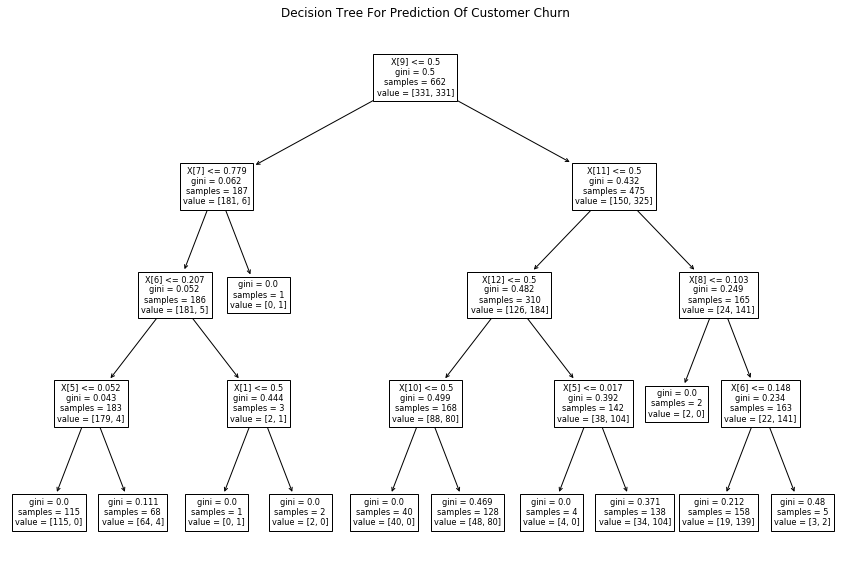

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_classifier)
plt.title('Decision Tree For Prediction Of Customer Churn')
plt.show()

In [35]:
# Saving Decision Tree Model Using Pickle
import pickle
filename = 'Decison_Tree_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(dt_classifier, file)

<a id='random_forest'></a>

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=300, max_depth=4, n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)
rf_f1_score = np.mean(cross_val_score(rf_classifier, X_train, y_train, scoring='f1', cv=5))

In [37]:
print('Random Forest Classifier F1-Score : ' + str(rf_f1_score))

Random Forest Classifier F1-Score : 0.8307806808268244


In [38]:
# Saving Random Forest Model Using Pickle
import pickle
filename = 'Random_Forest_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

### SVM Classifier

In [39]:
### SVM Classifier
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state = 300, probability=True)
svm_classifier.fit(X_train, y_train)
svm_f1_score = np.mean(cross_val_score(svm_classifier, X_train, y_train, scoring='f1', cv=5))

print('Support Vector Classifier F1-Score : ' + str(svm_f1_score))

# Saving SVM Model Using Pickle
import pickle
filename = 'SVM_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(svm_classifier, file)

Support Vector Classifier F1-Score : 0.8581064446418273


<a id='naive_bayes'></a>

### Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_f1_score = np.mean(cross_val_score(nb_classifier, X_train, y_train, scoring='f1', cv=5))

In [41]:
print('Naive Bayes Classifier F1-Score : ' + str(nb_f1_score))

Naive Bayes Classifier F1-Score : 0.8091488724854473


In [42]:
# Saving Naive Bayes Model Using Pickle
import pickle
filename = 'NB_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(nb_classifier, file)

<a id='lr'></a>

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(solver='liblinear')
lg_classifier.fit(X_train, y_train)
lg_f1_score = np.mean(cross_val_score(lg_classifier, X_train, y_train, scoring='f1', cv=5))

In [44]:
print('Logistic Regression F1-Score : ' + str(lg_f1_score))

Logistic Regression F1-Score : 0.8571515028929637


In [45]:
# Saving Logistic Regression Model Using Pickle
import pickle
filename = 'LGR_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(lg_classifier, file)

<a id='sg'></a>

### Stochastic Gradient Descent

In [46]:
from sklearn.linear_model import SGDClassifier
sg_classifier = SGDClassifier(loss='modified_huber', shuffle=True, random_state=300)
sg_classifier.fit(X_train, y_train)
sg_f1_score = np.mean(cross_val_score(sg_classifier, X_train, y_train, scoring='f1',cv=5))

In [47]:
print('Stochastic Gradient Descent F1-Score : ' + str(sg_f1_score))

Stochastic Gradient Descent F1-Score : 0.7828610957355089


In [48]:
# Saving Stochastic Gradient Descent Model Using Pickle
import pickle
filename = 'Stochastic_Gradient_Descent.model'
with open(filename, 'wb') as file:
    pickle.dump(sg_classifier, file)

<a id='model_eval'></a>

## Model Evaluation

In [49]:
model_eval_df = pd.DataFrame(columns=['Model','Train F1 Score','Test F1 Score','Test Accuracy'])
df_index = 0

<a id='knn_eval'></a>

### KNN Model Evaluation

In [50]:
# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['KNN', knn_f1_score, knn_test_f1_score, knn_test_acc_score]
df_index = df_index + 1

<a id='decision_tree_eval'></a>

### Decision Tree Evaluation

In [51]:
# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Decision Tree', dt_f1_score, dt_test_f1_score, dt_test_acc_score]
df_index = df_index + 1

<a id='random_forest_eval'></a>

### Random Forest Evaluation

In [52]:
predictions = rf_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
rf_test_f1_score = f1_score(y_test, predictions)
rf_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Random Forest', rf_f1_score, rf_test_f1_score, rf_test_acc_score]
df_index = df_index + 1

### SVM Model Evaluation

In [53]:
predictions = svm_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
svm_test_f1_score = f1_score(y_test, predictions)
svm_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['SVM Classifier', svm_f1_score, svm_test_f1_score, svm_test_acc_score]
df_index = df_index + 1

<a id='naive_bayes_eval'></a>

### Naive Bayes Model Evaluation

In [54]:
predictions = nb_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
nb_test_f1_score = f1_score(y_test, predictions)
nb_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Naive Bayes Classifier', nb_f1_score, nb_test_f1_score, nb_test_acc_score]
df_index = df_index + 1

<a id='lr_eval'></a>

### Logistic Regression Evaluation

In [55]:
predictions = lg_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
lg_test_f1_score = f1_score(y_test, predictions)
lg_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Logistic Regression', lg_f1_score, lg_test_f1_score, lg_test_acc_score]
df_index = df_index + 1

<a id='sg_eval'></a>

### Stochastic Gradient Descent Evaluation

In [56]:
predictions = sg_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
sg_test_f1_score = f1_score(y_test, predictions)
sg_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Stochastic Gradient Descent', sg_f1_score, sg_test_f1_score, sg_test_acc_score]
df_index = df_index + 1

<a id='model_compare'></a>

## Model Performance Comparison

In [57]:
model_eval_df

,Model,Train F1 Score,Test F1 Score,Test Accuracy
0,KNN,0.831753,0.908163,0.853659
1,Decision Tree,0.855633,0.917526,0.869919
2,Random Forest,0.830781,0.886486,0.829268
3,SVM Classifier,0.858106,0.918367,0.869919
4,Naive Bayes Classifier,0.809149,0.894737,0.837398
5,Logistic Regression,0.857152,0.907216,0.853659
6,Stochastic Gradient Descent,0.782861,0.918367,0.869919


## Creating Voting Classifier (ENSEMBLE)

In [58]:
from sklearn.ensemble import VotingClassifier
estimators = {('SVM',svm_classifier), ('Decision Tree',dt_classifier), ('SG',sg_classifier)}
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
en_f1_score = np.mean(cross_val_score(ensemble, X_train, y_train, scoring='f1',cv=5))

In [59]:
en_f1_score

0.8572427146571087

In [60]:
predictions = ensemble.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
en_test_f1_score = f1_score(y_test, predictions)
en_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['ENSEMBLE', en_f1_score, en_test_f1_score, en_test_acc_score]
df_index = df_index + 1

In [61]:
# Saving Ensemble Model Using Pickle
import pickle
filename = 'Ensemble.model'
with open(filename, 'wb') as file:
    pickle.dump(ensemble, file)

In [62]:
model_eval_df

,Model,Train F1 Score,Test F1 Score,Test Accuracy
0,KNN,0.831753,0.908163,0.853659
1,Decision Tree,0.855633,0.917526,0.869919
2,Random Forest,0.830781,0.886486,0.829268
3,SVM Classifier,0.858106,0.918367,0.869919
4,Naive Bayes Classifier,0.809149,0.894737,0.837398
5,Logistic Regression,0.857152,0.907216,0.853659
6,Stochastic Gradient Descent,0.782861,0.918367,0.869919
7,ENSEMBLE,0.857243,0.918367,0.869919
